In [1]:
import cv2
import matplotlib.pyplot as plt
import copy
import numpy as np
import time

from src import model
from src import util
from src.body import Body
import config


In [2]:
body_estimation = Body('model/body_pose_model.pth')

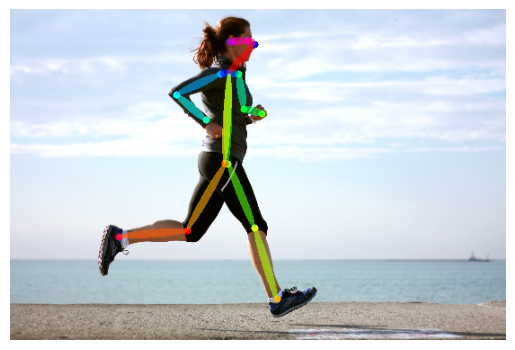

In [3]:
test_image = 'images/running1.jpg'
oriImg = cv2.imread(test_image)  # B,G,R order
scale =368/ oriImg.shape[0]
oriImg = cv2.resize(oriImg,None,fx=scale,fy=scale)
candidate, subset = body_estimation(oriImg)

canvas = copy.deepcopy(oriImg)
canvas = util.draw_bodypose(canvas, candidate, [subset])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

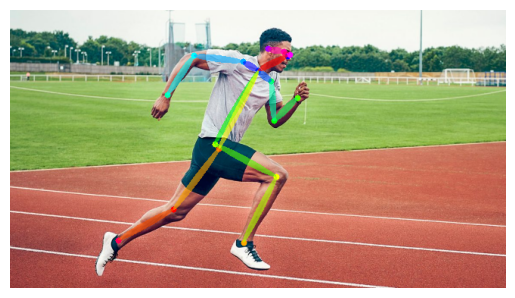

In [4]:
compare_image = 'images/running2.jpg'
compare_image = cv2.imread(compare_image)  # B,G,R order
scale =368/ compare_image.shape[0]
compare_image = cv2.resize(compare_image,None,fx=scale,fy=scale)
#oriImg = cv2.flip(oriImg,1)
candidate_cp, subset_cp = body_estimation(compare_image)

canvas = copy.deepcopy(compare_image)
canvas = util.draw_bodypose(canvas, candidate_cp, [subset_cp])
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
plt.show()

In [5]:
canvas,score,guide = body_estimation.compare(oriImg,compare_image)

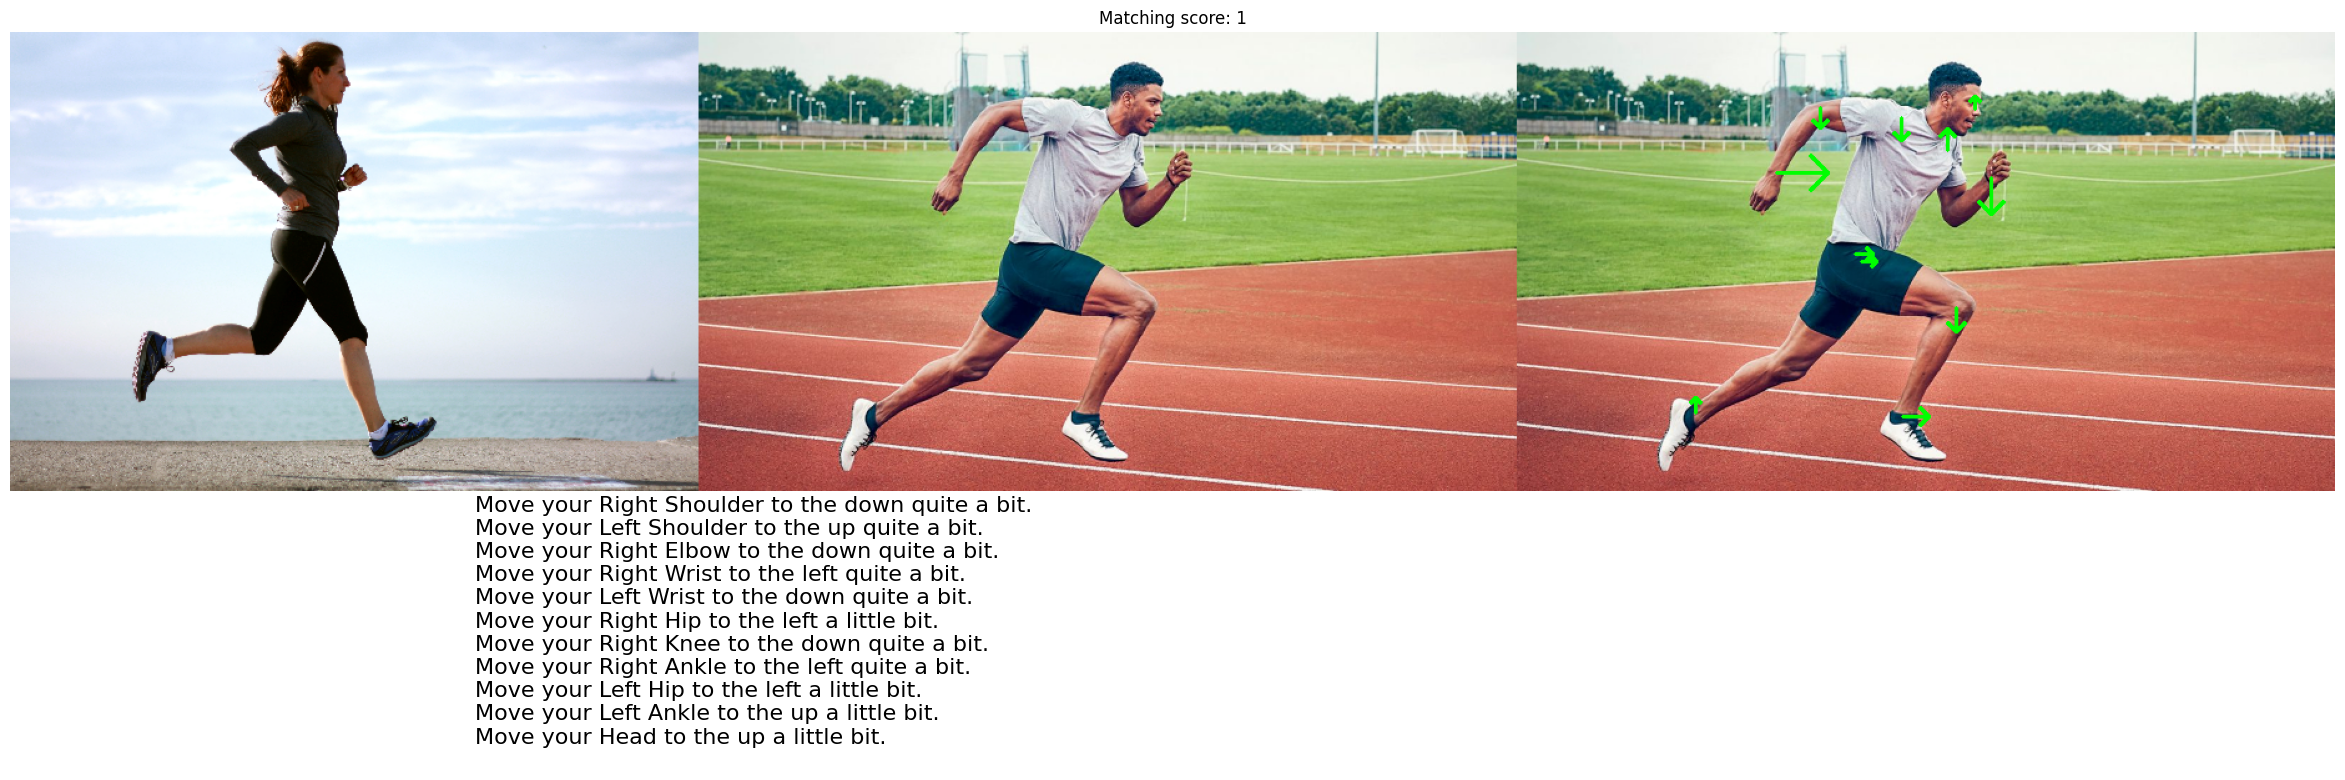

In [7]:
plt.figure(figsize=(30, 20))
plt.title(f"Matching score: {round(score)}")
plt.imshow(canvas[:, :, [2, 1, 0]])
plt.axis('off')
description = '''You're doing great! Let’s fine-tune a few things:\nDrop your right shoulder and lower your right elbow quite a bit. \nLift your left shoulder, shift your right wrist left, and drop your left wrist—all quite a bit. \n Move your right hip and left hip slightly to the left.\nLower your right knee, shift your right ankle left, and lift your left ankle—most of these are just a little.\n Finally, raise your head slightly upward.\nYou’re almost there—let’s nail this!"'''
plt.text(
    0.2, -0.6, guide, fontsize=16, ha='left', transform=plt.gca().transAxes
)
plt.show()

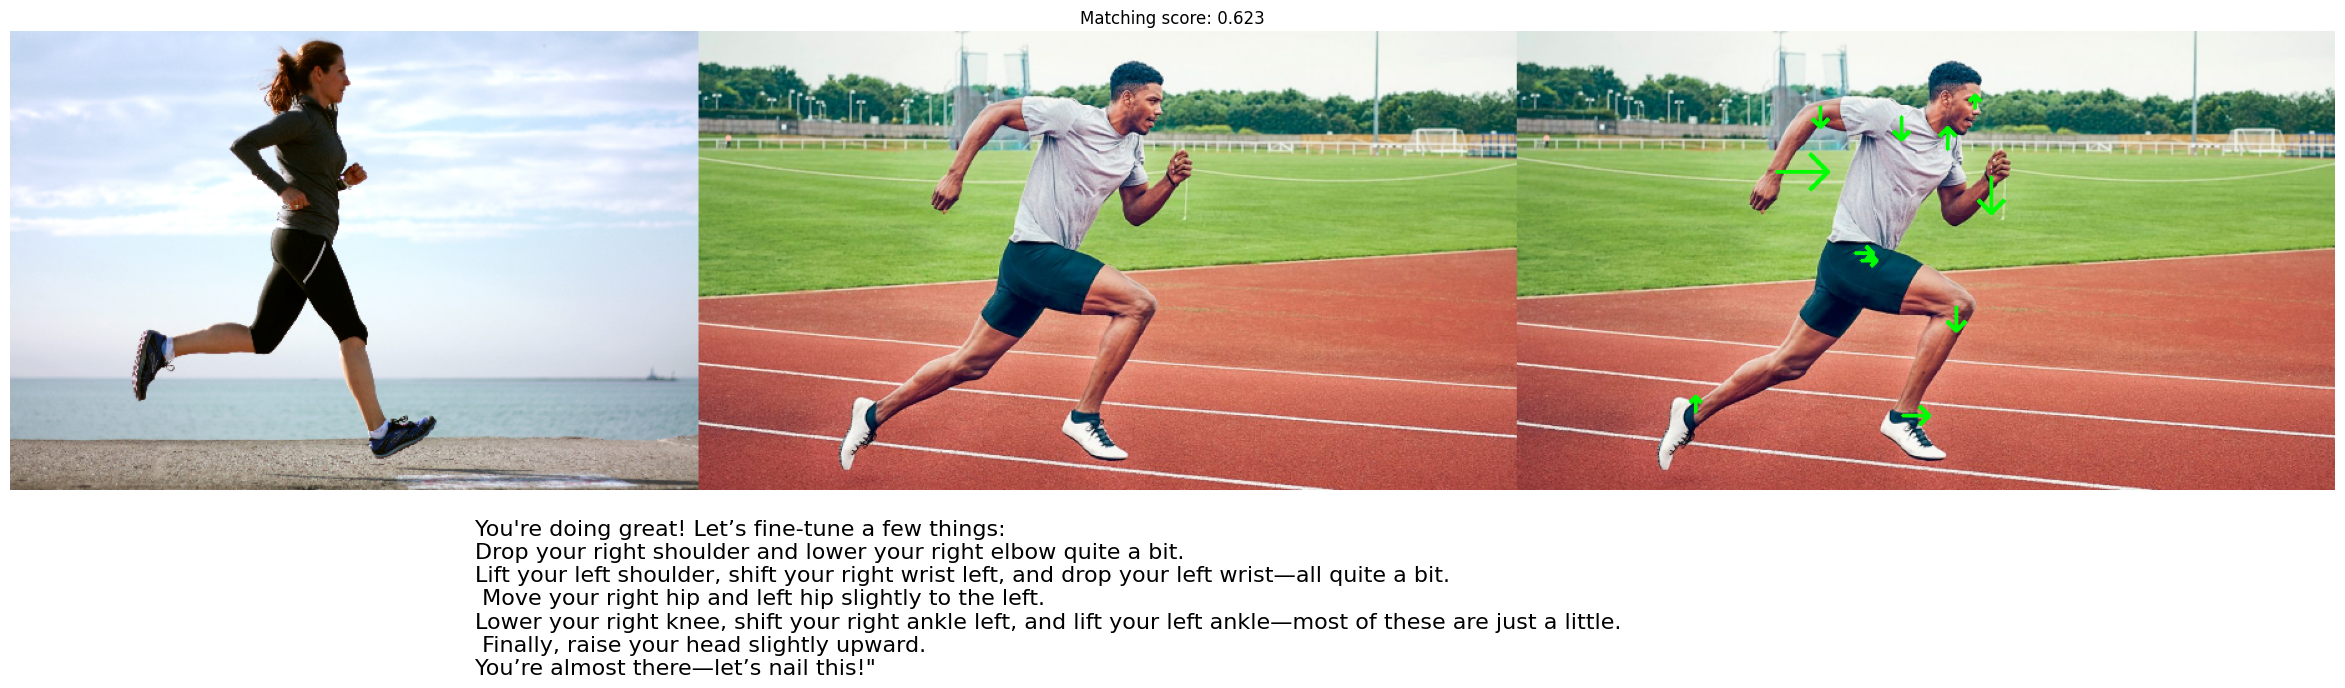

In [64]:
horizontal = cv2.hconcat([oriImg, compare_image, canvas1])
plt.figure(figsize=(30, 20))
plt.title(f"Matching score: {round(angles[1],3)}")
plt.imshow(horizontal[:, :, [2, 1, 0]])
plt.axis('off')
description = '''You're doing great! Let’s fine-tune a few things:\nDrop your right shoulder and lower your right elbow quite a bit. \nLift your left shoulder, shift your right wrist left, and drop your left wrist—all quite a bit. \n Move your right hip and left hip slightly to the left.\nLower your right knee, shift your right ankle left, and lift your left ankle—most of these are just a little.\n Finally, raise your head slightly upward.\nYou’re almost there—let’s nail this!"'''
plt.text(
    0.2, -0.4, description, fontsize=16, ha='left', transform=plt.gca().transAxes
)
plt.show()